https://www.kaggle.com/shubchat/1002-short-stories-from-project-guttenberg

In [1]:
DIR = "/home/chris/Documents/UNI_neu/Masterarbeit/data_new/guttenbergstories/"

In [34]:
from os.path import join, isdir, isfile, abspath, dirname, splitext, basename, split
from derive_conceptualspace.util.mpl_tools import show_hist

import pandas as pd

In [55]:
contents = pd.read_csv(join(DIR,"stories.csv"))
info = pd.read_csv(join(DIR,"db_books.csv"))
df = contents.merge(info, on="bookno")
for col in ["bookno", "Title", "Author", "Language"]:
    df[col] = df[col].str.strip()
assert len(df) == len(contents) == len(info)
with pd.option_context('display.expand_frame_repr', False, 'display.max_colwidth', 500):
    display(df.head())

,bookno,content,Title,Author,Language
0,51082.txt,"*** START OF THIS PROJECT GUTENBERG EBOOK COMING ATTRACTION ***\n\n\n\n\n\n\n\n\n\nProduced by Greg Weeks, Mary Meehan and the Online\n\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n Coming Attraction\n\n\n\n BY FRITZ LEIBER\n\n\n\n Illustrated by Paul Calle\n\n\n\n [Transcriber's Note: This etext was produced from\n\n Galaxy Science Fiction Nove...",Coming Attraction,Fritz Leiber,English
1,32243.txt,"*** START OF THIS PROJECT GUTENBERG EBOOK CONFIDENCE GAME ***\n\n\n\n\n\n\n\n\n\nProduced by Greg Weeks, David Wilson and the Online\n\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\n\n\n +--------------------------------------------------------------+\n\n | |\n\n | Transcriber's note: |\n\n | |\n\n | ...",Confidence Game,James McKimmey,English
2,306-0.txt,*** START OF THIS PROJECT GUTENBERG EBOOK EARLY SHORT FICTION ***\n\n\n\n\n\n\n\n\n\nProduced by John Hamm\n\n\n\n\n\n\n\n\n\n\n\nTHE EARLY SHORT FICTION OF EDITH WHARTON\n\n\n\nA Ten-Part Collection\n\n\n\nVolume Two\n\n\n\n\n\n\n\nContents of Part Two\n\n\n\n Stories\n\n AFTERWARD............................January 1910\n\n THE FULNESS OF LIFE..................December 1893\n\n A VENETIAN NIGHT’S ENTERTAINMENT.....December 190...,"The Early Short Fiction of Edith Wharton, Part 2 (of 10)",Edith Wharton,English
3,31038.txt,"*** START OF THIS PROJECT GUTENBERG EBOOK THE REAL HARD SELL ***\n\n\n\n\n\n\n\n\n\nProduced by Robert Cicconetti, David Wilson and the Online\n\nDistributed Proofreading Team at http://www.pgdp.net\n\n\n\n\n\n\n\n\n\n\n\n+--------------------------------------------------------------+\n\n| |\n\n| Transcriber's note: |\n\n| |\n\n| ...",The Real Hard Sell,William W Stuart,English
4,28636-8.txt,"*** START OF THIS PROJECT GUTENBERG EBOOK THE GREY WOMAN AND OTHER TALES ***\n\n\n\n\n\n\n\n\n\nProduced by Delphine Lettau and the Online Distributed\n\nProofreading Canada Team at http://www.pgdpcanada.net\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n[Illustration:\n\n\n\nTHE GREY WOMAN\n\nAND\n\nOTHER TALES.\n\n\n\nMRS. GASKELL\n\n\n\n\n\n\n\nSMITH ELDER & Co\n\n65 CORNHILL\n\n1865]\n\n\n\n\n\n\n\n\n\nTHE GREY WOMAN.\n\nAND OTHER TALES.\n\n\n\n\n\nBY MRS. GASKELL,\n\n\n\nAUTHOR OF ""MARY...",The Grey Woman and other Tales,Mrs. (Elizabeth) Gaskell,English


In [56]:
print(df.iloc[0]["content"][:1000]+"\n"+df.iloc[0]["content"][-1000:])

*** START OF THIS PROJECT GUTENBERG EBOOK COMING ATTRACTION ***









Produced by Greg Weeks, Mary Meehan and the Online

Distributed Proofreading Team at http://www.pgdp.net



















                           Coming Attraction



                            BY FRITZ LEIBER



                       Illustrated by Paul Calle



           [Transcriber's Note: This etext was produced from

                 Galaxy Science Fiction November 1950.

         Extensive research did not uncover any evidence that

         the U.S. copyright on this publication was renewed.]









           Women will always go on trying to attract men ...

             even when the future seems to have no future!





The coupe with the fishhooks welded to the fender shouldered up over

the curb like the nose of a nightmare. The girl in its path stood

frozen, her face probably stiff with fright under her mask. For once my

reflexes weren't shy. I took a fast step toward her, grabbed her elb

In [58]:
df["Language"].value_counts()

English               926
German                 25
French                 16
Italian                10
Spanish                 7
Chinese                 6
Portuguese              3
Finnish                 2
English and French      1
Latin                   1
Japanese                1
Dutch                   1
French / English        1
Greek                   1
Farsi                   1
Name: Language, dtype: int64

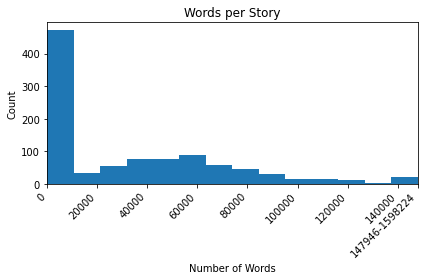

In [59]:
show_hist([i.count(" ") for i in df["content"]], "Words per Story", xlabel="Number of Words", cutoff_percentile=98)

534 ones are longer than 10000 words.


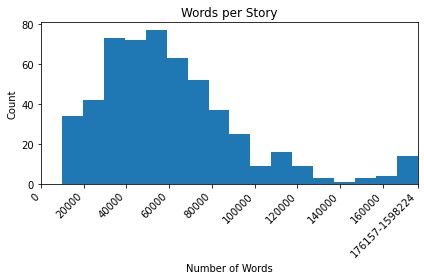

In [60]:
MIN_WORDS = 10000
longones = df[df["content"].str.count(" ") > MIN_WORDS]
show_hist([i.count(" ") for i in longones["content"]], "Words per Story", xlabel="Number of Words", cutoff_percentile=98)
print(f"{len(longones)} ones are longer than {MIN_WORDS} words.")

940 ones are longer than 2000 words.


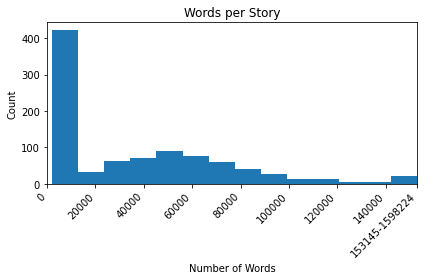

In [61]:
MIN_WORDS = 2000
longones = df[df["content"].str.count(" ") > MIN_WORDS]
show_hist([i.count(" ") for i in longones["content"]], "Words per Story", xlabel="Number of Words", cutoff_percentile=98)
print(f"{len(longones)} ones are longer than {MIN_WORDS} words.")

In [63]:
long_onlyen = longones[longones["Language"] == "English"]
print(f"Saving {len(long_onlyen)} ones which are long enough and only english.")
df.to_csv(join(DIR, "guttenbergstories.csv"))

Saving 871 ones which are long enough and only english.
